In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('plasma')

In [3]:
df_dict = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name=None)

In [4]:
# listing names of sheets in the excel file
df_dict.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [5]:
# listing columns of dataframes
for key, df in df_dict.items():
    print(f"key: ", key)
    print("Columns: ", df.columns.values, "\n")

key:  Customer_Demographics
Columns:  ['CustomerID' 'Age' 'Gender' 'MaritalStatus' 'IncomeLevel'] 

key:  Transaction_History
Columns:  ['CustomerID' 'TransactionID' 'TransactionDate' 'AmountSpent'
 'ProductCategory'] 

key:  Customer_Service
Columns:  ['CustomerID' 'InteractionID' 'InteractionDate' 'InteractionType'
 'ResolutionStatus'] 

key:  Online_Activity
Columns:  ['CustomerID' 'LastLoginDate' 'LoginFrequency' 'ServiceUsage'] 

key:  Churn_Status
Columns:  ['CustomerID' 'ChurnStatus'] 



### Data Selection Rationale
On a quick look at the data, we can see that all the dataframes should be taken for model building since they all provide relevant information.  
The relevant datasets are selected using domain knowledge, a quick thought on the kind of dataset will reveal a possible relation to the customer churn. The rationale is as following: 

- __Customer Demographics__ : The features such as MaritalStatus and IncomeLevel is too important to ignore since it is possible that the customer churn is influenced by a change in marital status or income level or even Age. 
- __Transaction History__ : The transaction dates, spending history could reveal a change in spending which might cause churning. Some customers may have left (or stayed) due to better offers or experiences.
- __Customer Service__ : Frequent customer service interaction should affect the churning. The resolution status of the interaction might have a direct correlation with the churn status.
- __Online activity__ : The frequency of online activity and a very old last login could indicate potential customer churn. 

#### Customer Churn

In [6]:
target_df = df_dict['Churn_Status']
target_df.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [7]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


No null values in the target variable

In [8]:
target_df['ChurnStatus'].value_counts()
# 0 = No Churn, 1 = Churn

ChurnStatus
0    796
1    204
Name: count, dtype: int64

### EDA

In [9]:
# reading csv files inside the processed_data folder
customer_demographics_df = pd.read_csv("../processed_data/Customer_Demographics.csv")
transaction_history_df = pd.read_csv("../processed_data/Transaction_History.csv")
customer_service_df = pd.read_csv("../processed_data/Customer_Service.csv")
online_activity_df = pd.read_csv("../processed_data/Online_Activity.csv")

# checking the shape of the dataframes
print("Customer Demographics shape: ", customer_demographics_df.shape)
print("Transaction History shape: ", transaction_history_df.shape)
print("Customer Service shape: ", customer_service_df.shape)
print("Online Activity shape: ", online_activity_df.shape)

# checking the first few rows of the dataframes
display(customer_demographics_df.head()) 
display(transaction_history_df.head())
display(customer_service_df.head())
display(online_activity_df.head())

Customer Demographics shape:  (1000, 7)
Transaction History shape:  (1000, 9)
Customer Service shape:  (668, 7)
Online Activity shape:  (1000, 5)


,CustomerID,Age,IncomeLevel,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,Gender_M
0,1,62,0,0,1,0,1
1,2,65,0,1,0,0,1
2,3,18,0,0,1,0,1
3,4,21,0,0,0,1,1
4,5,21,1,0,0,0,1


,CustomerID,TotalAmountSpent,Days_since_last_transaction,Days_since_first_transaction,Books,Clothing,Electronics,Furniture,Groceries
0,1,416.50,279,279,0,0,1,0,0
1,2,1547.42,42,356,0,2,3,1,1
2,3,1702.98,84,323,1,1,0,2,2
3,4,917.29,4,223,0,1,2,1,1
4,5,2001.49,10,313,0,0,3,2,3


,CustomerID,DaysSinceLastCustomerInteraction,Complaint,Feedback,Inquiry,Resolved,Unresolved
0,1,274,0,0,1,1,0
1,2,288,0,0,1,1,0
2,3,128,0,0,1,1,0
3,4,180,0,0,2,1,1
4,6,239,0,1,0,1,0


,CustomerID,LoginFrequency,Days_since_last_login,Online Banking,Website
0,1,34,71,0,0
1,2,5,26,0,1
2,3,3,46,0,1
3,4,2,128,0,1
4,5,41,65,0,1


In [10]:
# merging the dataframes with the target dataframe
customer_churn_df = target_df.merge(customer_demographics_df, on='CustomerID', how='left') \
                            .merge(transaction_history_df, on='CustomerID', how='left') \
                            .merge(customer_service_df, on='CustomerID', how='left') \
                            .merge(online_activity_df, on='CustomerID', how='left')

# merged dataframe
customer_churn_df

,CustomerID,ChurnStatus,Age,IncomeLevel,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,Gender_M,TotalAmountSpent,Days_since_last_transaction,...,DaysSinceLastCustomerInteraction,Complaint,Feedback,Inquiry,Resolved,Unresolved,LoginFrequency,Days_since_last_login,Online Banking,Website
0,1,0,62,0,0,1,0,1,416.50,279,...,274.0,0.0,0.0,1.0,1.0,0.0,34,71,0,0
1,2,1,65,0,1,0,0,1,1547.42,42,...,288.0,0.0,0.0,1.0,1.0,0.0,5,26,0,1
2,3,0,18,0,0,1,0,1,1702.98,84,...,128.0,0.0,0.0,1.0,1.0,0.0,3,46,0,1
3,4,0,21,0,0,0,1,1,917.29,4,...,180.0,0.0,0.0,2.0,1.0,1.0,2,128,0,1
4,5,0,21,1,0,0,0,1,2001.49,10,...,NaN,NaN,NaN,NaN,NaN,NaN,41,65,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,54,0,0,1,0,0,227.25,160,...,NaN,NaN,NaN,NaN,NaN,NaN,38,336,0,0
996,997,0,19,2,0,0,1,1,419.82,67,...,NaN,NaN,NaN,NaN,NaN,NaN,5,274,0,0
997,998,0,47,0,1,0,0,1,252.15,104,...,NaN,NaN,NaN,NaN,NaN,NaN,47,174,0,1
998,999,0,23,2,0,0,1,1,2393.26,24,...,NaN,NaN,NaN,NaN,NaN,NaN,23,357,0,1


In [11]:
customer_churn_df['CustomerID'].nunique()

1000

No duplicate customer ID in the dataset.

In [12]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerID                        1000 non-null   int64  
 1   ChurnStatus                       1000 non-null   int64  
 2   Age                               1000 non-null   int64  
 3   IncomeLevel                       1000 non-null   int64  
 4   MaritalStatus_Married             1000 non-null   int64  
 5   MaritalStatus_Single              1000 non-null   int64  
 6   MaritalStatus_Widowed             1000 non-null   int64  
 7   Gender_M                          1000 non-null   int64  
 8   TotalAmountSpent                  1000 non-null   float64
 9   Days_since_last_transaction       1000 non-null   int64  
 10  Days_since_first_transaction      1000 non-null   int64  
 11  Books                             1000 non-null   int64  
 12  Clothin

In [13]:
customer_churn_df.iloc[:,15:22]

,Groceries,DaysSinceLastCustomerInteraction,Complaint,Feedback,Inquiry,Resolved,Unresolved
0,0,274.0,0.0,0.0,1.0,1.0,0.0
1,1,288.0,0.0,0.0,1.0,1.0,0.0
2,2,128.0,0.0,0.0,1.0,1.0,0.0
3,1,180.0,0.0,0.0,2.0,1.0,1.0
4,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,0,NaN,NaN,NaN,NaN,NaN,NaN
996,0,NaN,NaN,NaN,NaN,NaN,NaN
997,0,NaN,NaN,NaN,NaN,NaN,NaN
998,2,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='DaysSinceLastCustomerInteraction'>

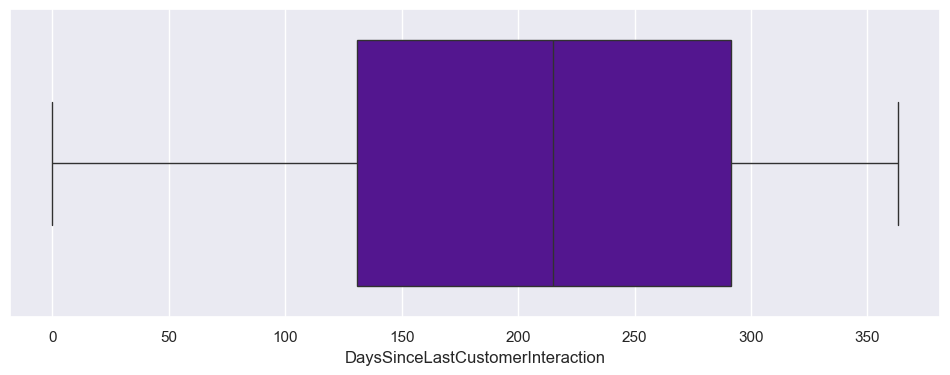

In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(customer_churn_df, x='DaysSinceLastCustomerInteraction')

There is a high amount of Null values in some of the columns and dropping those rows would mean losing a large share of significant data. Appropriate imputation methods are to be used.  

The values for imputation is chosen such that it represent the real scenario.  
The fill value __0__ for columns _Complaint_, _Feedback_, _Inquiry_, _Resolved_ and _Unresolved_ represent the real scenario that the customer has never had that specific interaction.  

For the column _DaysSinceLastCustomerInteraction_, flagging is used to handle null values. A separate column is created which flags the samples with NaN values and the existing null values are filled using the median of the column.

In [15]:
# flagging Nan values in DaysSinceLastCustomerInteraction column
# 1 for NaN, 0 for not NaN
customer_churn_df['NoCustomerServiceInteraction'] = customer_churn_df['DaysSinceLastCustomerInteraction'].isna().astype(int)
customer_churn_df['NoCustomerServiceInteraction'].value_counts()

NoCustomerServiceInteraction
0    668
1    332
Name: count, dtype: int64

In [16]:
# imputing null values in the dataset
values = {
    'DaysSinceLastCustomerInteraction':customer_churn_df.DaysSinceLastCustomerInteraction.median(),
    'Complaint':0,
    'Feedback':0,
    'Inquiry':0,
    'Resolved':0,
    'Unresolved':0
    }
customer_churn_df.fillna(value=values, inplace=True)
customer_churn_df.isnull().sum()

CustomerID                          0
ChurnStatus                         0
Age                                 0
IncomeLevel                         0
MaritalStatus_Married               0
MaritalStatus_Single                0
MaritalStatus_Widowed               0
Gender_M                            0
TotalAmountSpent                    0
Days_since_last_transaction         0
Days_since_first_transaction        0
Books                               0
Clothing                            0
Electronics                         0
Furniture                           0
Groceries                           0
DaysSinceLastCustomerInteraction    0
Complaint                           0
Feedback                            0
Inquiry                             0
Resolved                            0
Unresolved                          0
LoginFrequency                      0
Days_since_last_login               0
Online Banking                      0
Website                             0
NoCustomerSe

In [17]:
# customerId is now a redundant column, we can drop it
customer_churn_df.drop(columns='CustomerID', inplace=True)
customer_churn_df.columns

Index(['ChurnStatus', 'Age', 'IncomeLevel', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed', 'Gender_M',
       'TotalAmountSpent', 'Days_since_last_transaction',
       'Days_since_first_transaction', 'Books', 'Clothing', 'Electronics',
       'Furniture', 'Groceries', 'DaysSinceLastCustomerInteraction',
       'Complaint', 'Feedback', 'Inquiry', 'Resolved', 'Unresolved',
       'LoginFrequency', 'Days_since_last_login', 'Online Banking', 'Website',
       'NoCustomerServiceInteraction'],
      dtype='object')

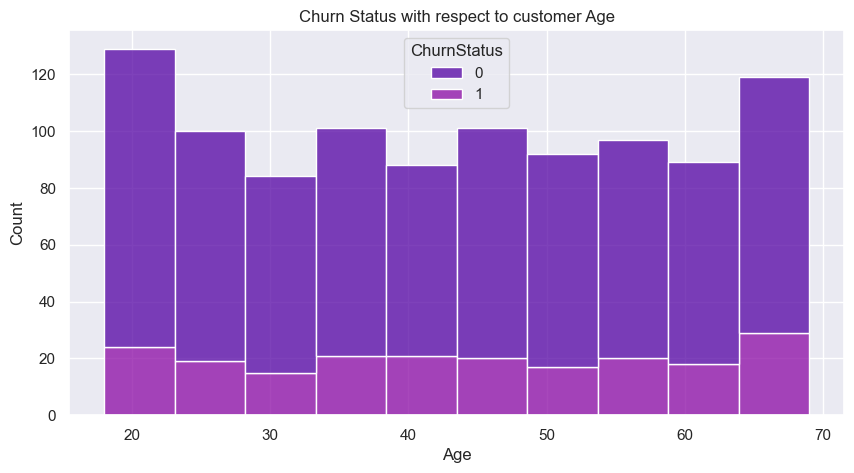

In [18]:
# churn status of customers with respect to their age
sns.histplot(data=customer_churn_df, x='Age', hue='ChurnStatus', multiple='stack', binwidth=5)
plt.title('Churn Status with respect to customer Age')
plt.show()

The customer churn is uniform over time.

<Axes: xlabel='TotalAmountSpent', ylabel='Count'>

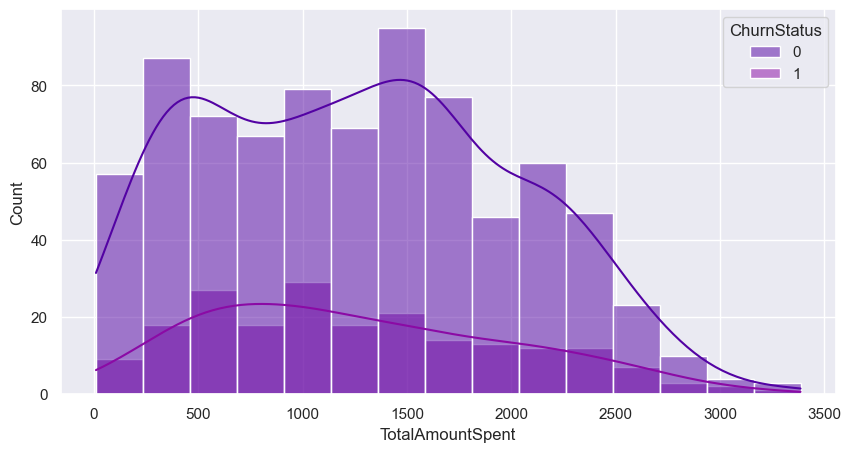

In [19]:
sns.histplot(data=customer_churn_df, x='TotalAmountSpent', kde=True, hue='ChurnStatus')

The distribution is a little right skewed. The customer churn is not significantly influenced by the total spent of the customer.

<Axes: xlabel='Days_since_first_transaction', ylabel='Count'>

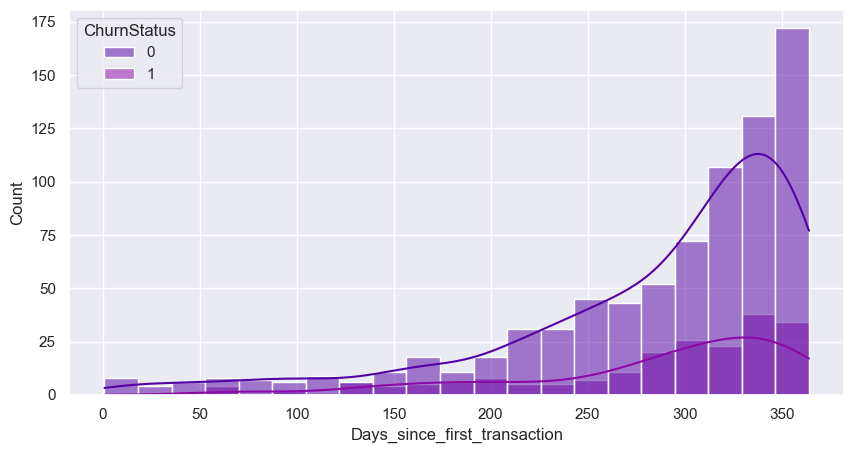

In [29]:
# plotting days since first transaction and last transaction
sns.histplot(data=customer_churn_df, x='Days_since_first_transaction', kde=True, hue='ChurnStatus')

<Axes: xlabel='Days_since_last_transaction', ylabel='Count'>

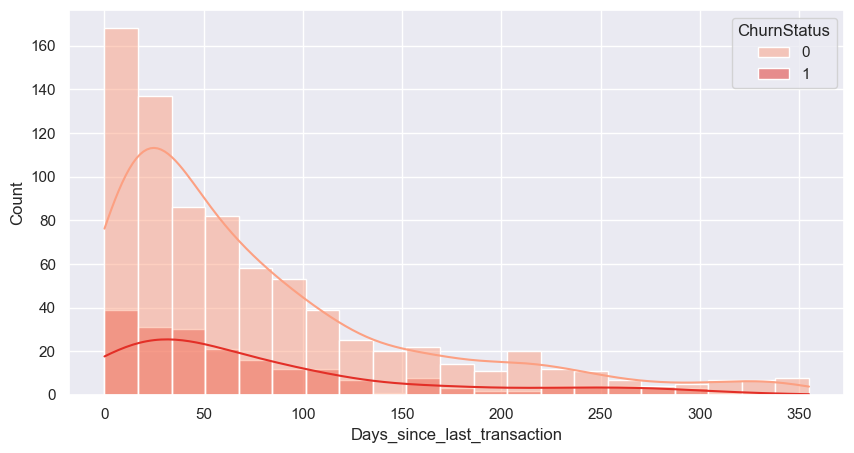

In [21]:
sns.histplot(data=customer_churn_df, x='Days_since_last_transaction',hue='ChurnStatus', palette='Reds', kde=True)

These columns are right and left skewed. The churn status is also skewed accordingly.

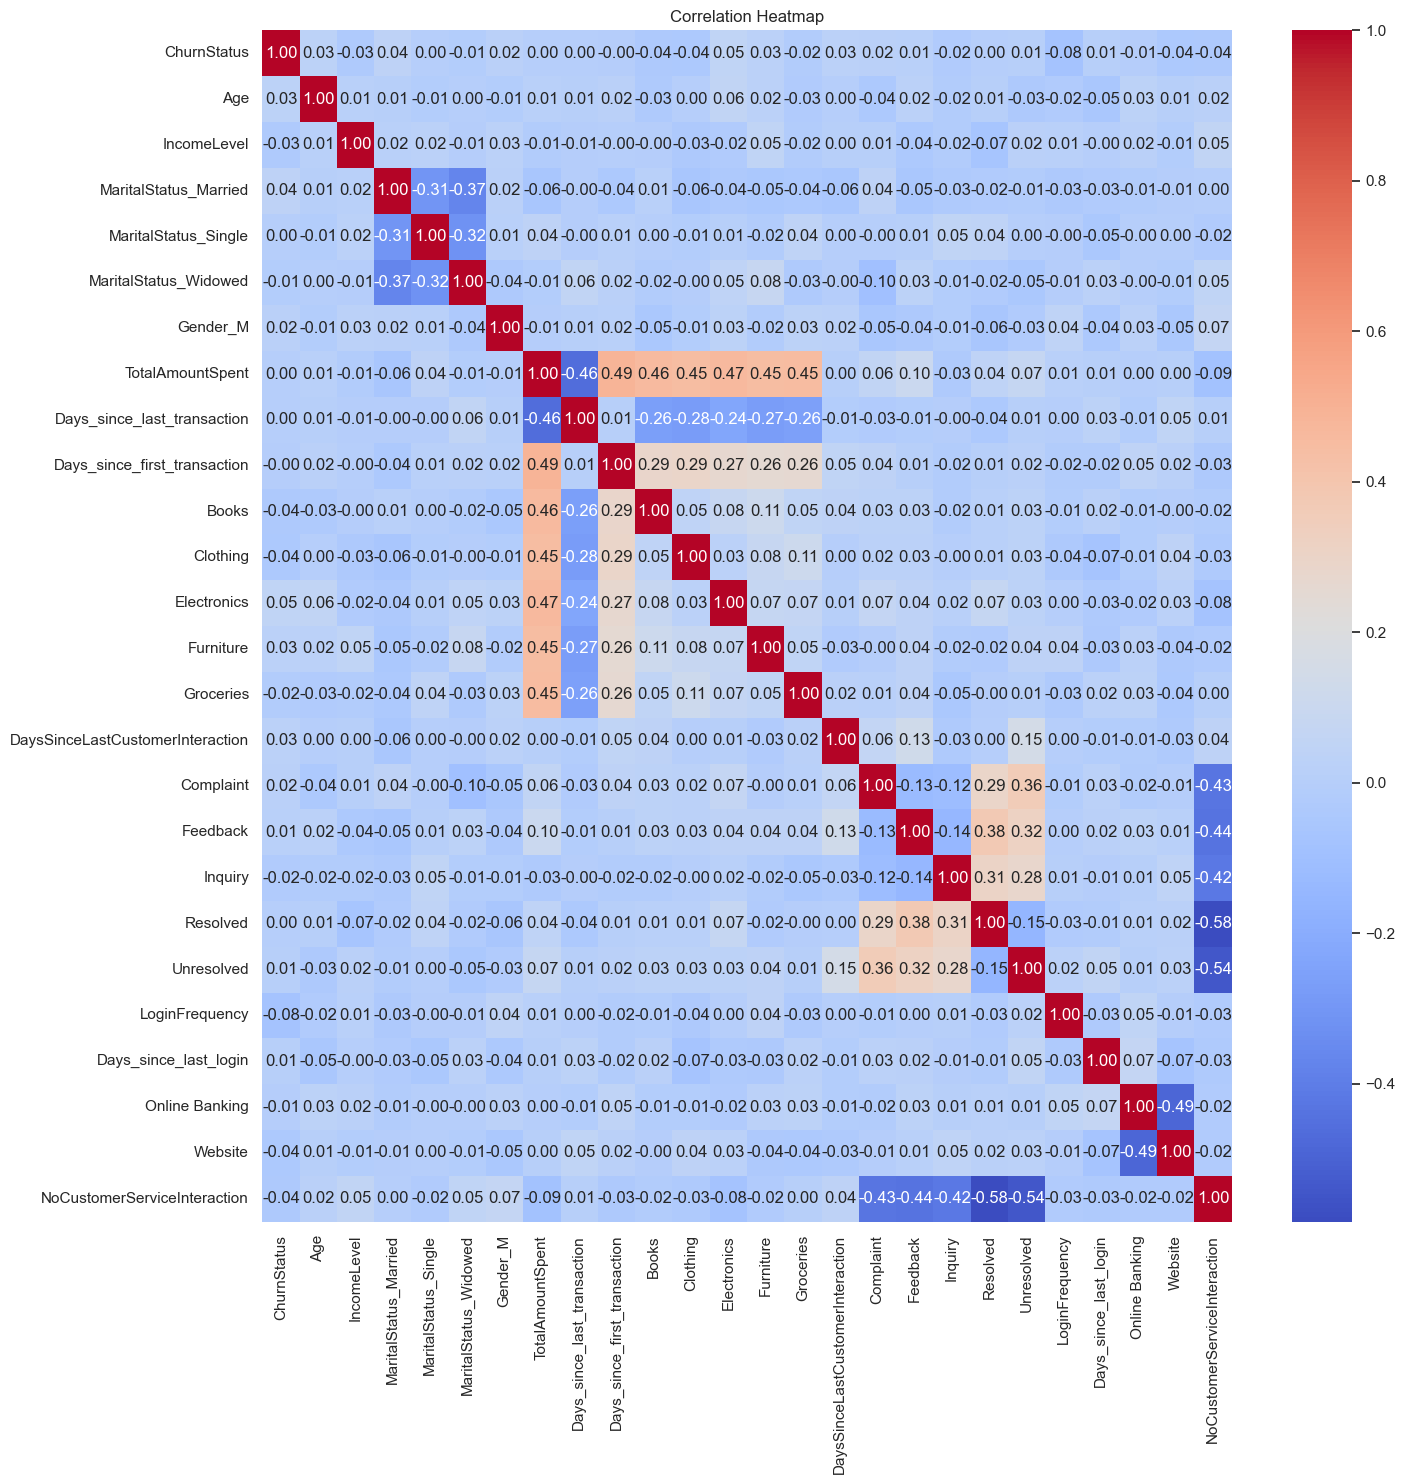

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(customer_churn_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()

Some of the features have good correlation with each other, but not high enough to induce multicollinearity.

In [30]:
customer_churn_df.to_csv("../artifacts/Customer_Churn_Data_Cleaned.csv", index=False)